<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582445-1694709119/blob/main/21BDS0320_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 2**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, OneHotEncoder


In [3]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/PPGE.csv')

In [4]:
print("Initial Shape of Data:", data.shape)
print("First few rows of the dataset:\n", data.head())
print("Summary of Dataset Info:\n")
data.info()

Initial Shape of Data: (1020, 10)
First few rows of the dataset:
    rownames    country iso3c  year  govtspendgdp   tradegdp    kaopen  \
0         1  Australia   AUS  1970     25.316267  26.153638 -0.159932   
1         2  Australia   AUS  1971     26.051857  25.554840 -0.159932   
2         3  Australia   AUS  1972     27.023659  24.757565 -0.159932   
3         4  Australia   AUS  1973     26.591579  25.131972 -0.159932   
4         5  Australia   AUS  1974     30.912184  26.322852 -0.159932   

   ka_open  v2catrauni  v2catrauni_ord  
0    0.417       2.265               4  
1    0.417       2.265               4  
2    0.417       2.265               4  
3    0.417       2.265               4  
4    0.417       2.265               4  
Summary of Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rownames        1020 

In [5]:
# 1. Data Deduplication - Checking and removing duplicates if present
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicates}")
data = data.drop_duplicates()
print("Shape of data after deduplication:", data.shape)

Number of duplicate rows in the dataset: 0
Shape of data after deduplication: (1020, 10)


In [6]:
# 2. Handling Missing Data
# Selecting numeric and categorical columns
numeric_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# KNN Imputation for numeric columns, Simple Imputer for categorical columns
knn_imputer = KNNImputer(n_neighbors=5)
simple_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_cols] = knn_imputer.fit_transform(data[numeric_cols])
data[categorical_cols] = simple_imputer.fit_transform(data[categorical_cols])

print("Data after handling missing values:\n", data.isnull().sum())


Data after handling missing values:
 rownames          0
country           0
iso3c             0
year              0
govtspendgdp      0
tradegdp          0
kaopen            0
ka_open           0
v2catrauni        0
v2catrauni_ord    0
dtype: int64


In [7]:
# 3. Data Encoding - One-Hot Encoding for categorical variables if any
ohe = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = ohe.fit_transform(data[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# Merging the encoded categorical data with the main dataframe
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, categorical_encoded_df], axis=1)
print("Data after One-Hot Encoding:\n", data.head())

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [8]:
# 4. Data Scaling - Standardization for numeric values
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print("Data after standardization:\n", data[numeric_cols].head())

Data after standardization:
    rownames      year  govtspendgdp  tradegdp    kaopen   ka_open  v2catrauni  \
0 -1.730354 -1.698416     -1.858898 -1.149038 -1.437112 -1.437112    0.775063   
1 -1.726957 -1.630479     -1.782654 -1.165909 -1.437112 -1.437112    0.775063   
2 -1.723561 -1.562542     -1.681926 -1.188373 -1.437112 -1.437112    0.775063   
3 -1.720165 -1.494606     -1.726711 -1.177824 -1.437112 -1.437112    0.775063   
4 -1.716769 -1.426669     -1.278878 -1.144271 -1.437112 -1.437112    0.775063   

   v2catrauni_ord  
0        1.395246  
1        1.395246  
2        1.395246  
3        1.395246  
4        1.395246  


In [9]:

# 5. Binning for 'govtspendgdp' (or another continuous variable, if applicable)
# Adjusting for real-world application by showing economic insights
if 'govtspendgdp' in data.columns:
    binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
    data['govtspendgdp_binned'] = binner.fit_transform(data[['govtspendgdp']])
    print("Data after binning 'govtspendgdp':\n", data[['govtspendgdp', 'govtspendgdp_binned']].head())

Data after binning 'govtspendgdp':
    govtspendgdp  govtspendgdp_binned
0     -1.858898                  1.0
1     -1.782654                  1.0
2     -1.681926                  1.0
3     -1.726711                  1.0
4     -1.278878                  1.0


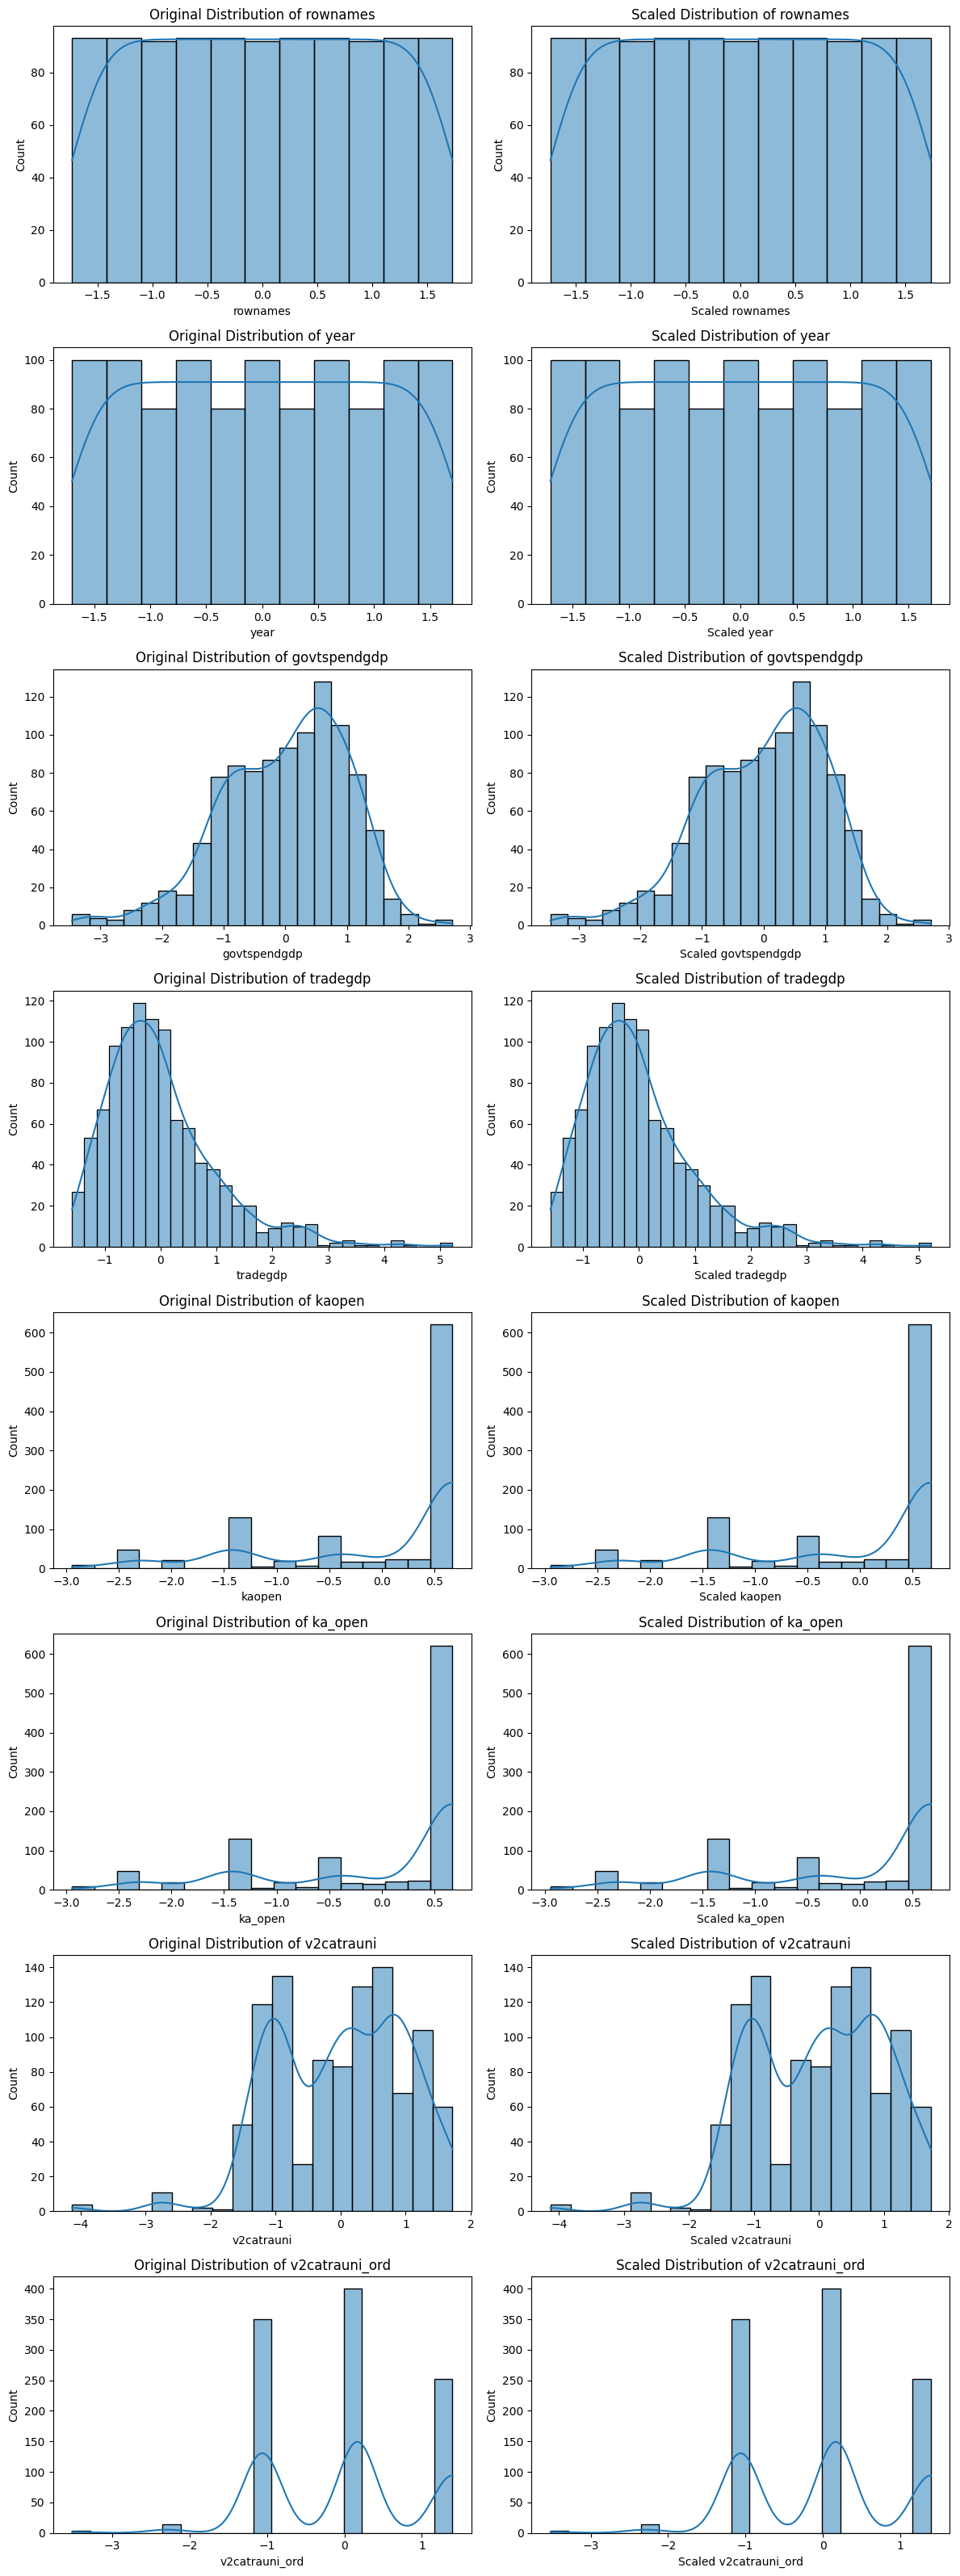

<ipython-input-10-9211ed8a9e8d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='govtspendgdp_binned', data=data, palette="viridis")


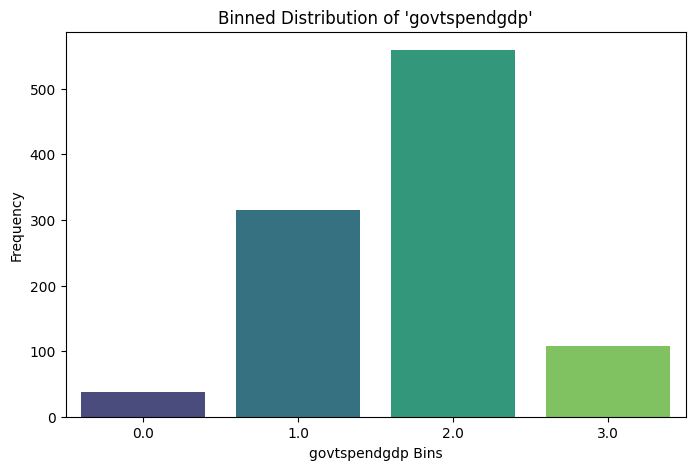

In [10]:
# Visualizations

# Plotting the distribution of numeric columns before and after scaling
fig, ax = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols):
    # Original Distribution
    sns.histplot(data[col], ax=ax[i, 0], kde=True)
    ax[i, 0].set_title(f'Original Distribution of {col}')
    ax[i, 0].set_xlabel(col)

    # Scaled Distribution
    sns.histplot(data[col], ax=ax[i, 1], kde=True)
    ax[i, 1].set_title(f'Scaled Distribution of {col}')
    ax[i, 1].set_xlabel(f'Scaled {col}')

plt.tight_layout()
plt.show()

# Binned 'govtspendgdp' Visualization
if 'govtspendgdp_binned' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='govtspendgdp_binned', data=data, palette="viridis")
    plt.title("Binned Distribution of 'govtspendgdp'")
    plt.xlabel("govtspendgdp Bins")
    plt.ylabel("Frequency")
    plt.show()